# Four Administrations: A Hypothesis Test

The composition of congress often changes during the course of a president's administration. This change provides an interesting opportunity: the ability to compare bipartisanship within an administration.

These four, a balance of two Republican and two Democratic administrations, present two mutually-exclusive scenarios:

- the party holds both the executive and both chambers of congress
- one party holds the executive and both chambers are held by the opposition

| Years   | President & Party |     | Congress | House (D) | House (R) | House (other) | Senate (D) | Senate (R) | Senate (other) | Government is: |
| ------- | ----------------- | --- | -------- | --------- | --------- | ------------- | ---------- | ---------- | -------------- | -------------- |
| 1947-48 | Truman            | D   | 80th     | 188       | 246       | 1             | 45         | 51         | 0              | divided        |
| 1949-50 | Truman            | D   | 81st     | 263       | 171       | 1             | 54         | 42         | 0              | unified        |
| 1953-54 | Eisenhower        | R   | 83rd     | 213       | 221       | 1             | 47         | 48         | 1              | unified        |
| 1955-56 | Eisenhower        | R   | 84th     | 232       | 203       | 0             | 48         | 47         | 1              | divided        |
| 1993-94 | Clinton           | D   | 103rd    | 258       | 176       | 1             | 57         | 43         | 0              | unified        |
| 1995-96 | Clinton           | D   | 104th    | 202       | 232       | 1             | 46         | 54         | 0              | divided        |
| 2005-06 | Bush, GW          | R   | 109th    | 200       | 234       | 1             | 45         | 55         | 0              | unified        |
| 2007-08 | Bush, GW          | R   | 110th    | 231       | 204       | 0             | 51         | 49         | 0              | divided        |


# Hypothesis:

There is a statistically significant difference in congressional
bipartisanship between unified and divided governments.

- $H_0: \mu_{1} = \mu_{2}$ There is no statistical difference in the means
- $H_1: \mu_{1} \neq \mu_{2}$ There is a statistical difference in the
  means

- $ \alpha = 0.05$


# Methodology & Rationale:

- Sample data will be divided in to mutually exclusive categories: four Unified years and four Divided years.
- Welch's T test will be employed on the data to determine statistical difference
- Welch's accommodates for possible differences in variance
- Sample sizes are large enough to accommodate possible non-normal distribution


### Imports:


Core Imports


In [1]:
import pandas as pd
import numpy as np
from scipy import stats

Plotting imports & settings

References:

- [Center graphs in window](https://stackoverflow.com/a/47801379)


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    margin:auto;
}
.prompt 
    display:none;
}  
</style>
""")

Import Custom Functions


In [3]:
# ensure custom code is on path
import sys
sys.path.insert(0, '../')

In [4]:
from src.ratio_calc import (
    calculate_bpr,
    bpr_result_graph,
    get_bpr_data_from_urls,
    bpr_result_graph_ax)

### Gather & Process Unified & Divided Data


In [5]:
# Create lists of divided & unified congressional sessions
hs_divided_sessions = [80, 84, 104, 110]
hs_unified_sessions = [81, 83, 103, 109]

### Fetch & process associated files


In [6]:
# divided
divided_bpr_hs_sessions = get_bpr_data_from_urls(
    given_list=hs_divided_sessions, chamber="HS")

In [7]:
# unified
unified_bpr_hs_sessions = get_bpr_data_from_urls(
    given_list=hs_unified_sessions, chamber="HS")

In [8]:
# Confirm keys:
print(
    divided_bpr_hs_sessions.keys(),
    unified_bpr_hs_sessions.keys(),
    sep="\n")

dict_keys(['hs_080', 'hs_084', 'hs_104', 'hs_110'])
dict_keys(['hs_081', 'hs_083', 'hs_103', 'hs_109'])


In [9]:
# combine divided bpr lists into single sample list
d_hs_080 = [divided_bpr_hs_sessions['hs_080'][i][1]
            for i in range(len(divided_bpr_hs_sessions['hs_080']))]
d_hs_084 = [divided_bpr_hs_sessions['hs_084'][i][1]
            for i in range(len(divided_bpr_hs_sessions['hs_084']))]
d_hs_104 = [divided_bpr_hs_sessions['hs_104'][i][1]
            for i in range(len(divided_bpr_hs_sessions['hs_104']))]
d_hs_110 = [divided_bpr_hs_sessions['hs_110'][i][1]
            for i in range(len(divided_bpr_hs_sessions['hs_110']))]

divided_bpr_sample = d_hs_080 + d_hs_084 + d_hs_104 + d_hs_110

In [10]:
# combine unified bpr lists into single sample list
u_hs_081 = [unified_bpr_hs_sessions['hs_081'][i][1]
            for i in range(len(unified_bpr_hs_sessions['hs_081']))]
u_hs_083 = [unified_bpr_hs_sessions['hs_083'][i][1]
            for i in range(len(unified_bpr_hs_sessions['hs_083']))]
u_hs_103 = [unified_bpr_hs_sessions['hs_103'][i][1]
            for i in range(len(unified_bpr_hs_sessions['hs_103']))]
u_hs_109 = [unified_bpr_hs_sessions['hs_109'][i][1]
            for i in range(len(unified_bpr_hs_sessions['hs_109']))]

unified_bpr_sample = u_hs_081 + u_hs_083 + u_hs_103 + u_hs_109

## Describe the Distributions


In [11]:
# describe divided sample
describe_divided = stats.describe(
    divided_bpr_sample, axis=0, ddof=1,
    bias=True, nan_policy='propagate')

describe_divided._asdict()

{'nobs': 5514,
 'minmax': (0.0, 1.0),
 'mean': 0.4266587693691865,
 'variance': 0.0946772207874681,
 'skewness': 0.2855269328285173,
 'kurtosis': -1.2983813232861967}

In [12]:
# describe unified sample
describe_unified = stats.describe(
    unified_bpr_sample, axis=0, ddof=1,
    bias=True, nan_policy='propagate')

describe_unified._asdict()

{'nobs': 4785,
 'minmax': (0.0, 1.0),
 'mean': 0.4536611933412079,
 'variance': 0.09577539191753283,
 'skewness': 0.15330375535565288,
 'kurtosis': -1.3465516323841615}

## Box Plot: Divided vs Unified Samples

The box plot indicates that there is a difference between the means of
the two sample distributions.


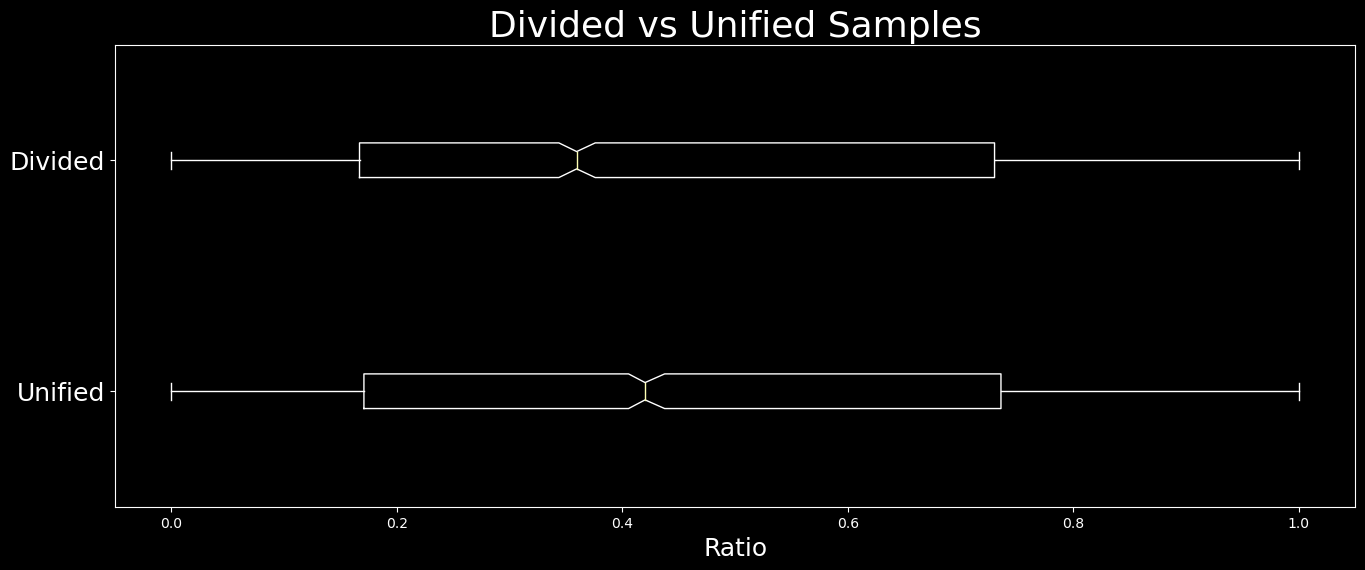

In [13]:
samples = [unified_bpr_sample, divided_bpr_sample]

red_square = dict(markerfacecolor='r', marker='s')
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(16, 6))

ax.boxplot(samples, flierprops=red_square,
           vert=False, notch=True, bootstrap=10000)

ax.set_title('Divided vs Unified Samples', fontsize=26)
ax.set_yticklabels(["Unified", "Divided"], fontsize=18)
ax.set_xlabel("Ratio", fontsize=18)

# plt.savefig("divided_vs_unified_box_plot", dpi=600, bbox_inches='tight')
plt.show()

## Perform Welch's T Test

Welch's T test returned a p value of $7.04 * 10^{-6}$, which was well
within our $\alpha = 0.05$.

Bootstrapping would assist in confirming the results.


In [22]:
ttest_results = stats.ttest_ind(
    divided_bpr_sample, unified_bpr_sample, axis=0,
    equal_var=False, nan_policy='propagate')

ttest_results

Ttest_indResult(statistic=-4.42804978982108, pvalue=9.609071866049597e-06)

Results:

```text
statistic=-4.42804978982108
pvalue=9.609071866049597e-06

```

The Welch's T-Test indicates that there is a statistically significant
difference in the bipartisanship between unified and divided governments.

It's interesting to note that the unified governments observed indicate
more bipartisanship as measured.


## Confirm results via Bootstrap method

For each distribution:

- create a sample of 1000 values, randomly chosen from the distribution with replacement
- find the mean of this set of 1000 values
- repeat this process, creating a list of 10000 means from each distribution


In [15]:
# establish bootstrap repetition size and sample size
bstrp_size = 10000
smple_n = 1000

In [16]:
# list of len bstrp_size, each smple_n sized

# divided
divided_samples = [np.random.choice(
    divided_bpr_sample,
    size=smple_n,
    replace=True,
    p=None) for i in range(bstrp_size)]

In [17]:
# unified
unified_samples = [np.random.choice(
    unified_bpr_sample,
    size=smple_n,
    replace=True,
    p=None) for i in range(bstrp_size)]

In [18]:
divided_means = np.mean(divided_samples, axis=0)
unified_means = np.mean(unified_samples, axis=0)

## Create KDE Plot

A kernel density estimate (KDE) plot is similar to a histogram that uses
a continuous probability density curve. The plot visually demonstrates
the significance of the difference.


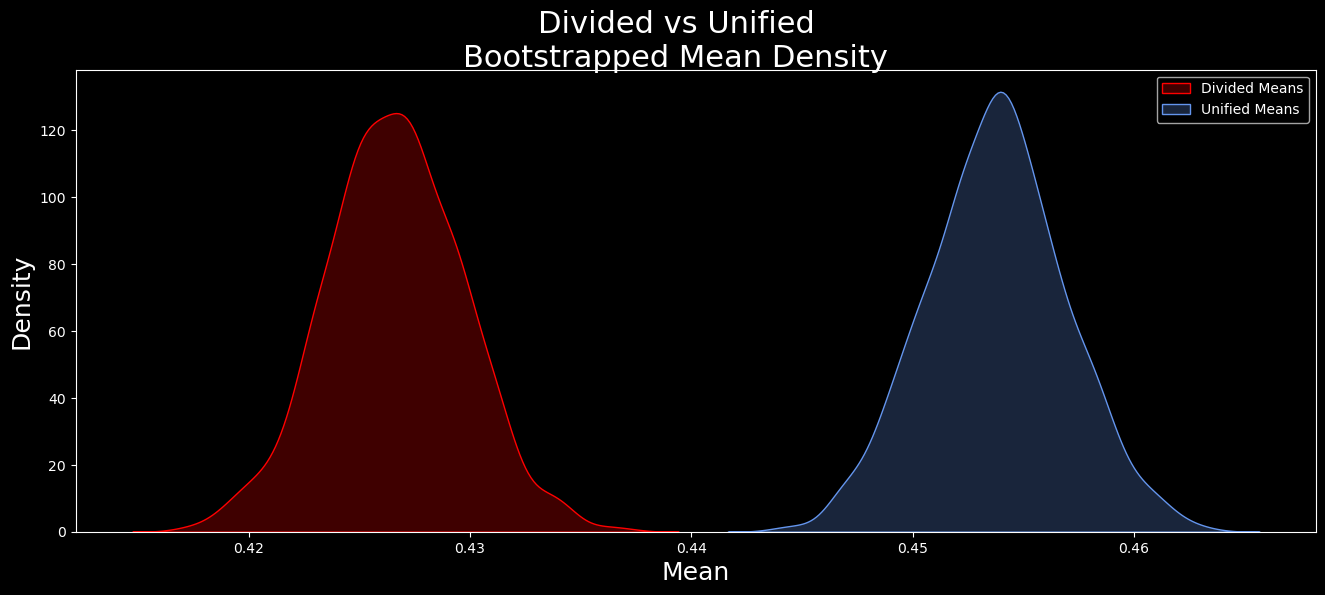

In [19]:
# plot of 2 variables
fig, p1 = plt.subplots(figsize=(16, 6))

p1 = sns.kdeplot(divided_means, fill=True, color="r")
p1 = sns.kdeplot(unified_means, fill=True, color="cornflowerblue")

fig.suptitle(
    "Divided vs Unified\nBootstrapped Mean Density",
    fontsize=22)

p1.legend(
    ('Divided Means', 'Unified Means'),
    loc='upper right')

p1.set_xlabel('Mean', fontsize=18)
p1.set_ylabel('Density', fontsize=18)

# plt.savefig(
#     "d_vs_u_bootstrap_mean_density",
#     dpi=600,
#     bbox_inches='tight')

plt.show()

## Calculate Margin of Error for Each Bootstrapped Distribution


In [20]:
# Calculate the standard deviation of the means of the bootstrap samples.
divided_means_std = np.std(divided_means)
unified_means_std = np.std(unified_means)

# double the standard deviation for the 95% confidence interval.
divided_margin_of_error = 2 * np.std(divided_means)
unified_margin_of_error = 2 * np.std(unified_means)

We are 95% confident that the population mean lies within this margin of
error. More specifically if we were to take many samples, 95% percent of
the time the population mean would lie within this margin of error.


In [21]:
print(f"Divided Margin of Error: {divided_margin_of_error}")
print(f"Unified Margin of Error: {unified_margin_of_error}")

Divided Margin of Error: 0.0061732270609776065
Unified Margin of Error: 0.006270709531621962


## Conclusions, Next Steps

Although the scale of values is quite fine, Welch's T test allows us to
reject the null hypothesis.

Additionally, the data suggests that a unified government may demonstrate
a slight, but statistically significant, increase in legislative
bipartisanship.

Further research directions include:

- Refining the metric, possibly based upon per capita votes to accommodate
  vote volume differences
- Broadening inquiry into sessions where only one chamber is in
  opposition to the administration
- Training a model to predict mean bipartisanship


## Sources & References:

### Primary data source:

Lewis, Jeffrey B., Keith Poole, Howard Rosenthal, Adam Boche, Aaron
Rudkin, and Luke Sonnet (2020). Voteview: Congressional Roll-Call Votes
Database. https://voteview.com/

### Party Control of Presidency and Congress

https://cstl-cla.semo.edu/rdrenka/ui320-75/presandcongress.asp  
https://en.wikipedia.org/wiki/Divided_government_in_the_United_States
